In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
DATA_FOLDER = 'dataset'
DATASET_TRAIN = os.path.join(DATA_FOLDER, 'RavdessAudioOnlyFeatures_TRAIN.csv')
DATASET_TEST = os.path.join(DATA_FOLDER, 'RavdessAudioOnlyFeatures_TEST.csv')
PREPROCESSED_TRAIN = os.path.join(DATA_FOLDER, 'preprocessed_dataset_TRAIN.csv')
PREPROCESSED_TEST = os.path.join(DATA_FOLDER, 'preprocessed_dataset_TEST.csv')

In [3]:
df_train = pd.read_csv(DATASET_TRAIN)
df_train.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,frame_count,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,1,M,03-01-01-01-01-01-01.wav,158558,...,1.0,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,1.0,6.742190,-1.706215
1,audio-only,speech,neutral,normal,Kids are talking by the door,2nd,1,M,03-01-01-01-01-02-01.wav,160160,...,1.0,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,1.0,-0.700420,-0.201495
2,audio-only,speech,neutral,normal,Dogs are sitting by the door,1st,1,M,03-01-01-01-02-01-01.wav,156956,...,1.0,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.0,1.688986,-1.024773
3,audio-only,speech,neutral,normal,Dogs are sitting by the door,2nd,1,M,03-01-01-01-02-02-01.wav,152152,...,1.0,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,1.0,-0.594111,-0.412871
4,audio-only,speech,calm,normal,Kids are talking by the door,1st,1,M,03-01-02-01-01-01-01.wav,169769,...,1.0,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,1.0,0.126535,-0.620782


In [4]:
df_test = pd.read_csv(DATASET_TEST)
df_test.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,frame_count,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,19,M,03-01-01-01-01-01-19.wav,161762,...,1.0,0.306697,0.466157,0.645931,0.789123,0.908316,1.0,1.0,-0.260279,-0.566556
1,audio-only,speech,neutral,normal,Kids are talking by the door,2nd,19,M,03-01-01-01-01-02-19.wav,155355,...,1.0,0.170786,0.279347,0.557524,0.733053,0.866973,1.0,1.0,-0.428900,-0.587210
2,audio-only,speech,neutral,normal,Dogs are sitting by the door,1st,19,M,03-01-01-01-02-01-19.wav,160160,...,1.0,0.023285,0.305395,0.577750,0.741576,0.889984,1.0,1.0,0.626916,-0.883317
3,audio-only,speech,neutral,normal,Dogs are sitting by the door,2nd,19,M,03-01-01-01-02-02-19.wav,158558,...,1.0,0.368081,0.434591,0.620144,0.776419,0.904668,1.0,1.0,-0.825144,-0.383701
4,audio-only,speech,calm,normal,Kids are talking by the door,1st,19,M,03-01-02-01-01-01-19.wav,176176,...,1.0,0.298851,0.393112,0.623309,0.772964,0.907035,1.0,1.0,-0.536669,-0.547354


In [5]:
df_train.shape

(1828, 434)

In [6]:
df_test.shape

(624, 434)

In [7]:
single_value_columns_train = [column for column in df_train.columns if len(df_train[column].unique()) == 1]
len(single_value_columns_train)

52

In [8]:
missing_values_columns_train = [column for column in df_train.columns if df_train[column].isna().any()]
len(missing_values_columns_train)

0

In [9]:
single_value_columns_test = [column for column in df_train.columns if len(df_test[column].unique()) == 1]
len(single_value_columns_test)

50

In [10]:
difference = [column for column in single_value_columns_train if column not in single_value_columns_test]
difference

['zc_q75_w1', 'zc_q75_w2']

In [11]:
missing_values_columns_test = [column for column in df_train.columns if df_train[column].isna().any()]
len(missing_values_columns_test)

0

In [12]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.shape

(2452, 434)

In [13]:
single_value_columns = [column for column in df_train.columns if len(df[column].unique()) == 1]
single_value_columns

['modality',
 'lag1_q50',
 'zc_min',
 'zc_max',
 'zc_q01',
 'zc_q05',
 'zc_q25',
 'zc_q50',
 'zc_q75',
 'zc_q99',
 'stft_max',
 'stft_q95',
 'stft_q99',
 'lag1_q50_w1',
 'zc_min_w1',
 'zc_max_w1',
 'zc_q01_w1',
 'zc_q05_w1',
 'zc_q25_w1',
 'zc_q50_w1',
 'zc_min_w2',
 'zc_max_w2',
 'zc_q01_w2',
 'zc_q05_w2',
 'zc_q25_w2',
 'zc_q50_w2',
 'zc_q99_w2',
 'stft_max_w2',
 'stft_q95_w2',
 'stft_q99_w2',
 'zc_min_w3',
 'zc_max_w3',
 'zc_q01_w3',
 'zc_q05_w3',
 'zc_q25_w3',
 'zc_q50_w3',
 'zc_q75_w3',
 'zc_q99_w3',
 'stft_max_w3',
 'stft_q95_w3',
 'stft_q99_w3',
 'lag1_q50_w4',
 'zc_min_w4',
 'zc_max_w4',
 'zc_q01_w4',
 'zc_q05_w4',
 'zc_q25_w4',
 'zc_q50_w4',
 'stft_max_w4',
 'stft_q99_w4']

In [14]:
to_drop = ['filename'] + single_value_columns
df = df.drop(to_drop, axis=1)
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,frame_count,sum,mean,...,stft_std_w4,stft_min_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,1,M,158558,0.145081,9.150000e-07,...,0.155455,0.000000,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,6.742190,-1.706215
1,speech,neutral,normal,Kids are talking by the door,2nd,1,M,160160,0.114319,7.137790e-07,...,0.163183,0.270133,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,-0.700420,-0.201495
2,speech,neutral,normal,Dogs are sitting by the door,1st,1,M,156956,0.149963,9.554485e-07,...,0.190634,0.000000,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.688986,-1.024773
3,speech,neutral,normal,Dogs are sitting by the door,2nd,1,M,152152,0.139618,9.176213e-07,...,0.182551,0.205616,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,-0.594111,-0.412871
4,speech,calm,normal,Kids are talking by the door,1st,1,M,169769,0.137665,8.108948e-07,...,0.177069,0.177847,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,0.126535,-0.620782


In [15]:
from pandas.core.dtypes.common import is_numeric_dtype
"""
numeric_attr_list = [column for column in df.columns if is_numeric_dtype(df[column])]
corr_columns = []

for column_i in numeric_attr_list:
    corr_with_i = [column_i]

    for column_j in numeric_attr_list:
        if column_i != column_j and abs(df[column_i].corr(df[column_j], method='spearman')) > 0.95:
            corr_with_i.append(column_j)

    if len(corr_with_i) > 1:
        corr_columns.append(sorted(corr_with_i)) """

"\nnumeric_attr_list = [column for column in df.columns if is_numeric_dtype(df[column])]\ncorr_columns = []\n\nfor column_i in numeric_attr_list:\n    corr_with_i = [column_i]\n\n    for column_j in numeric_attr_list:\n        if column_i != column_j and abs(df[column_i].corr(df[column_j], method='spearman')) > 0.95:\n            corr_with_i.append(column_j)\n\n    if len(corr_with_i) > 1:\n        corr_columns.append(sorted(corr_with_i)) "

In [16]:
"""corr_columns_set = set()
for corr_list in corr_columns:
    corr_columns_set.add(tuple(corr_list))

corr_columns_set """

'corr_columns_set = set()\nfor corr_list in corr_columns:\n    corr_columns_set.add(tuple(corr_list))\n\ncorr_columns_set '

In [18]:
numeric_attr_list = [column for column in df.columns if is_numeric_dtype(df[column])]
corr_columns = dict()

for column_i in numeric_attr_list:
    pass



In [19]:
df_train[["min", "min_w1", "min_w2"]]

,min,min_w1,min_w2
0,-0.038422,-0.009399,-0.038422
1,-0.042603,-0.001678,-0.042603
2,-0.037018,-0.000153,-0.037018
3,-0.036652,-0.000122,-0.036652
4,-0.026245,-0.001343,-0.026245
...,...,...,...
1823,-0.033722,-0.000061,-0.033722
1824,-0.071899,-0.000519,-0.067017
1825,-0.056213,-0.000305,-0.051758
1826,-0.070465,-0.000854,-0.057800


In [20]:
import matplotlib.pyplot as plt
import numpy as np

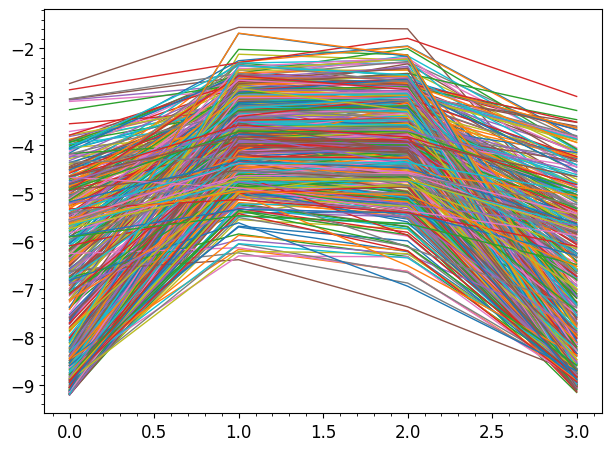

In [24]:
for i in range(100):
    l = []
    for j in [1,2,3,4]:
        l.append(np.log(df_train.iloc[i][f"std_w{j}"] + 1e-4))
    plt.plot(l)

In [31]:
df_train["std_w1"].sort_values(ascending=True)[0:20]

1367    0.000000e+00
314     0.000000e+00
315     0.000000e+00
1597    0.000000e+00
324     0.000000e+00
148     3.251552e-07
223     3.937506e-07
1352    3.956688e-07
1583    4.465031e-07
1612    5.131159e-07
1606    5.982042e-07
1363    1.024584e-06
110     1.101518e-06
130     1.253644e-06
213     1.344055e-06
1358    1.375753e-06
1405    1.414177e-06
1361    1.576392e-06
843     1.690376e-06
1599    1.693941e-06
Name: std_w1, dtype: float64

(array([  6.,  11.,  55., 117., 292., 336., 296., 346., 308.,  61.]),
 array([-7.        , -6.41862782, -5.83725564, -5.25588347, -4.67451129,
        -4.09313911, -3.51176693, -2.93039476, -2.34902258, -1.7676504 ,
        -1.18627822]),
 <BarContainer object of 10 artists>)

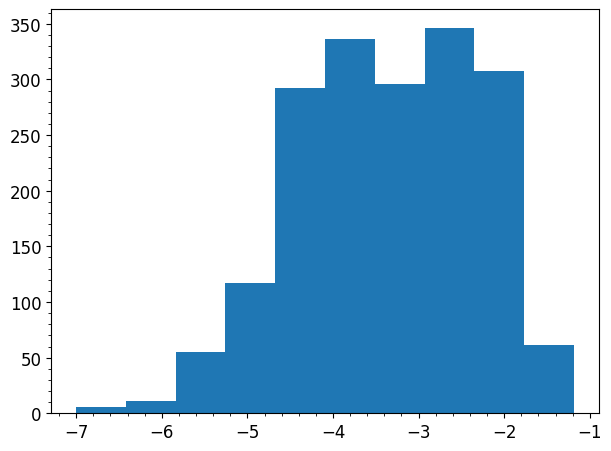

In [39]:
df_train["dummy"] = df_train["std_w1"].copy()
df_train.loc[df_train.dummy==0.0, "dummy"] = 1e-7
df_train.dummy  = df_train.dummy.apply(np.log10)
plt.hist(df_train.dummy)